In [1]:
pip install textblob


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install snscrape


Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install wordcloud


In [4]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [6]:
#Reading csv file
dataset= pd.read_csv("dataset.csv")
dataset

,date,username,content,retweets,likes
0,2022-10-31 08:42:02+00:00,CMShehbaz,I extend my congratulations to H.E. Luiz Ináci...,644,2436
1,2022-10-30 14:07:08+00:00,ImranKhanPTI,Shocked &amp; deeply saddened by the terrible ...,24416,83314
2,2022-10-30 08:36:47+00:00,CMShehbaz,I am saddened at the tragic death of 146 peopl...,862,5045
3,2022-10-29 17:37:22+00:00,ImranKhanPTI,For all those spreading rumours about my mtg i...,28635,86544
4,2022-10-29 07:15:54+00:00,CMShehbaz,"On the 99th Republic Day of Turkiye, I extend ...",622,2883
...,...,...,...,...,...
8995,2011-12-12 09:31:48+00:00,CMShehbaz,Had a quick look - interesting. Pl come and se...,0,0
8996,2011-12-12 07:26:02+00:00,CMShehbaz,@TabishChawla Not really - we are not perfect ...,0,0
8997,2011-12-12 07:10:52+00:00,CMShehbaz,Pak is facing internal/external challenges - P...,3,1
8998,2011-12-11 16:57:40+00:00,CMShehbaz,@DaBieberLoverr Thanks - all praise be to Alla...,0,0


In [7]:
#length of data
print('length of data is: ', len(dataset))

length of data is:  9000


In [8]:
#shape of the dataset
dataset.shape

(9000, 5)

In [9]:
#DataSet Information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      9000 non-null   object
 1   username  9000 non-null   object
 2   content   9000 non-null   object
 3   retweets  9000 non-null   int64 
 4   likes     9000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 351.7+ KB


In [10]:
#Data Types of all columns
dataset.dtypes

date        object
username    object
content     object
retweets     int64
likes        int64
dtype: object

In [11]:
#total rows and columns
print('Count of columns in the data is:  ', len(dataset.columns))
print('Count of rows in the data is:  ', len(dataset))

Count of columns in the data is:   5
Count of rows in the data is:   9000


In [12]:
#checking null values
dataset.isnull().sum()

date        0
username    0
content     0
retweets    0
likes       0
dtype: int64

# Tokenization

In [13]:
import nltk
from nltk.tokenize import TweetTokenizer


In [14]:
# Initialize the tokenizer
tokenizer = TweetTokenizer()

# Apply tokenization on the clean_tweet column
dataset["clean_tweet_tokenized"] = dataset["content"].apply(lambda x: tokenizer.tokenize(x))

# Print the tokenized tweets
print(dataset["clean_tweet_tokenized"])

0       [I, extend, my, congratulations, to, H, ., E, ...
1       [Shocked, &, deeply, saddened, by, the, terrib...
2       [I, am, saddened, at, the, tragic, death, of, ...
3       [For, all, those, spreading, rumours, about, m...
4       [On, the, 99th, Republic, Day, of, Turkiye, ,,...
                              ...                        
8995    [Had, a, quick, look, -, interesting, ., Pl, c...
8996    [@TabishChawla, Not, really, -, we, are, not, ...
8997    [Pak, is, facing, internal, /, external, chall...
8998    [@DaBieberLoverr, Thanks, -, all, praise, be, ...
8999    [Missed, it, -, but, sublime, performance, onc...
Name: clean_tweet_tokenized, Length: 9000, dtype: object


In [15]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

import re
import pandas as pd
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package vader_lexicon to C:\Users\Mr.
[nltk_data]     Nadeem\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package words to C:\Users\Mr.
[nltk_data]     Nadeem\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [16]:

sentence = dataset['content'][0]
sid.polarity_scores(sentence)['compound']

0.9337

In [17]:
#The output of the code above is -0.6249, indicating that the sentence is of negative sentiment.

# Data Cleaning

In [18]:
def cleaner(content):
    content = re.sub("@[A-Za-z0-9]+", "", content) # Remove @ sign
    content = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", content) # Remove http links
    content = " ".join(content.split())
    content = content.replace("#", "").replace("_", " ") # Remove hashtag sign but keep the text
    content = " ".join(re.findall(r'\b\w+\b', content.lower())) # Remove non-alphabetic characters and convert to lowercase
    return content

dataset['clean_tweet'] = dataset['content'].apply(cleaner)


In [19]:
print(dataset['clean_tweet'])

0       i extend my congratulations to h e luiz inácio...
1       shocked amp deeply saddened by the terrible ac...
2       i am saddened at the tragic death of 146 peopl...
3       for all those spreading rumours about my mtg i...
4       on the 99th republic day of turkiye i extend o...
                              ...                        
8995    had a quick look interesting pl come and see m...
8996    not really we are not perfect but we have trie...
8997    pak is facing internal external challenges pml...
8998    thanks all praise be to allah who is giving us...
8999    missed it but sublime performance once again b...
Name: clean_tweet, Length: 9000, dtype: object


In [20]:
from textblob import TextBlob

def get_tweet_sentiment(clean_tweet):
    # create TextBlob object of the tweet
    blob = TextBlob(clean_tweet)

    # get sentiment polarity (ranges from -1 to 1)
    sentiment_polarity = blob.sentiment.polarity

    # assign label based on sentiment polarity
    if sentiment_polarity > 0:
        return "positive"
    elif sentiment_polarity < 0:
        return "negative"
    else:
        return "neutral"



In [21]:
# create a new 'label' column and assign labels to each tweet
dataset['Sentiment'] = dataset['clean_tweet'].apply(get_tweet_sentiment)

print(dataset[['clean_tweet', 'Sentiment']])

                                            clean_tweet Sentiment
0     i extend my congratulations to h e luiz inácio...  positive
1     shocked amp deeply saddened by the terrible ac...  negative
2     i am saddened at the tragic death of 146 peopl...  negative
3     for all those spreading rumours about my mtg i...  positive
4     on the 99th republic day of turkiye i extend o...  positive
...                                                 ...       ...
8995  had a quick look interesting pl come and see m...  positive
8996  not really we are not perfect but we have trie...  positive
8997  pak is facing internal external challenges pml...   neutral
8998  thanks all praise be to allah who is giving us...  positive
8999  missed it but sublime performance once again b...   neutral

[9000 rows x 2 columns]


In [22]:
new_df = pd.DataFrame(dataset[['clean_tweet', 'Sentiment']])
new_df

,clean_tweet,Sentiment
0,i extend my congratulations to h e luiz inácio...,positive
1,shocked amp deeply saddened by the terrible ac...,negative
2,i am saddened at the tragic death of 146 peopl...,negative
3,for all those spreading rumours about my mtg i...,positive
4,on the 99th republic day of turkiye i extend o...,positive
...,...,...
8995,had a quick look interesting pl come and see m...,positive
8996,not really we are not perfect but we have trie...,positive
8997,pak is facing internal external challenges pml...,neutral
8998,thanks all praise be to allah who is giving us...,positive


# StopWords Remove

In [23]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Mr.
[nltk_data]     Nadeem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
stopwords.words('english')


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

# Stopwords

In [25]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download stopwords
nltk.download('stopwords')

# Tokenize the text data
tokens = new_df['clean_tweet'].apply(word_tokenize)

# Remove stopwords from the tokens
stop_words = set(stopwords.words('english'))
tokens_without_stopwords = tokens.apply(lambda x: [word for word in x if word.lower() not in stop_words])
print(tokens_without_stopwords)

[nltk_data] Downloading package stopwords to C:\Users\Mr.
[nltk_data]     Nadeem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0       [extend, congratulations, h, e, luiz, inácio, ...
1       [shocked, amp, deeply, saddened, terrible, acc...
2       [saddened, tragic, death, 146, people, stamped...
3       [spreading, rumours, mtg, lahore, reason, retu...
4       [99th, republic, day, turkiye, extend, heartie...
                              ...                        
8995    [quick, look, interesting, pl, come, see, pak,...
8996                  [really, perfect, tried, sincerely]
8997    [pak, facing, internal, external, challenges, ...
8998    [thanks, praise, allah, giving, us, strength, ...
8999     [missed, sublime, performance, barca, yesterday]
Name: clean_tweet, Length: 9000, dtype: object


# EDA

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

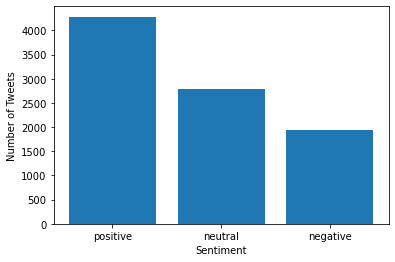

In [27]:

sentiment_counts = new_df['Sentiment'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

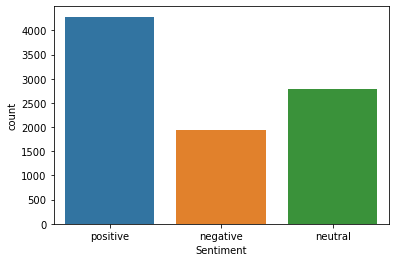

In [28]:
# countplot to show the distribution of sentiment labels
sns.countplot(data=new_df, x='Sentiment')


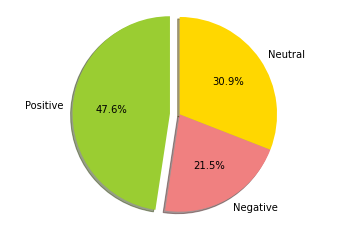

In [29]:
# Load the data
#dataset = pd.read_csv('tweets.csv')

# Classify the tweets using a sentiment analysis model
# ...

# Count the number of tweets in each category
num_pos = len(new_df[new_df['Sentiment'] == 'positive'])
num_neg = len(new_df[new_df['Sentiment'] == 'negative'])
num_neu = len(new_df[new_df['Sentiment'] == 'neutral'])

# Plot the pie chart
labels = ['Positive', 'Negative', 'Neutral']
sizes = [num_pos, num_neg, num_neu]
colors = ['yellowgreen', 'lightcoral', 'gold']
explode = (0.1, 0, 0) # explode the first slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()


Text(0.5, 1.0, 'Positive Word Frequency Distribution')

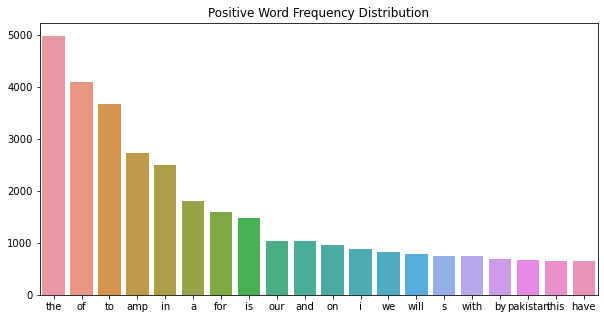

In [30]:
from collections import Counter
# get word frequency distribution for positive tweets
positive_tweets = ' '.join(new_df[new_df['Sentiment'] == 'positive']['clean_tweet'].tolist())
positive_words = positive_tweets.split()
positive_word_count = Counter(positive_words)

# create bar plot to show word frequency distribution for positive tweets
plt.figure(figsize=(10, 5))
sns.barplot(x=[x[0] for x in positive_word_count.most_common(20)],
            y=[x[1] for x in positive_word_count.most_common(20)])
plt.title('Positive Word Frequency Distribution')




Text(0.5, 1.0, 'Negative Word Frequency Distribution')

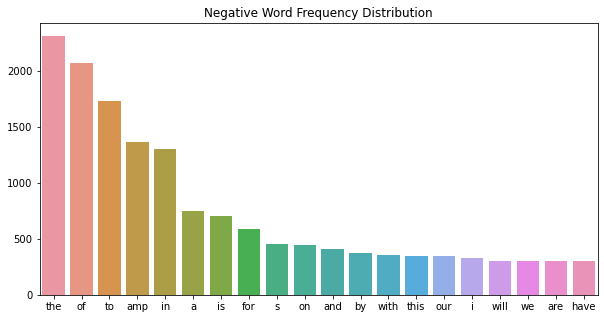

In [31]:
# get word frequency distribution for negative tweets
negative_tweets = ' '.join(new_df[new_df['Sentiment'] == 'negative']['clean_tweet'].tolist())
negative_words = negative_tweets.split()
negative_word_count = Counter(negative_words)

# create bar plot to show word frequency distribution for negative tweets
plt.figure(figsize=(10, 5))
sns.barplot(x=[x[0] for x in negative_word_count.most_common(20)],
            y=[x[1] for x in negative_word_count.most_common(20)])
plt.title('Negative Word Frequency Distribution')



Text(0.5, 1.0, 'Neutral Word Frequency Distribution')

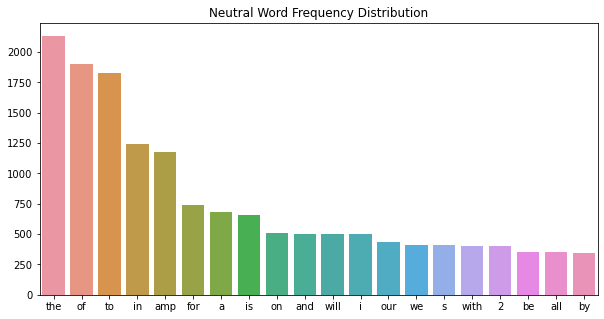

In [32]:
# get word frequency distribution for neutral tweets
neutral_tweets = ' '.join(new_df[new_df['Sentiment'] == 'neutral']['clean_tweet'].tolist())
neutral_words = neutral_tweets.split()
neutral_word_count = Counter(neutral_words)


# create bar plot to show word frequency distribution for neutral tweets
plt.figure(figsize=(10, 5))
sns.barplot(x=[x[0] for x in neutral_word_count.most_common(20)],
            y=[x[1] for x in neutral_word_count.most_common(20)])
plt.title('Neutral Word Frequency Distribution')


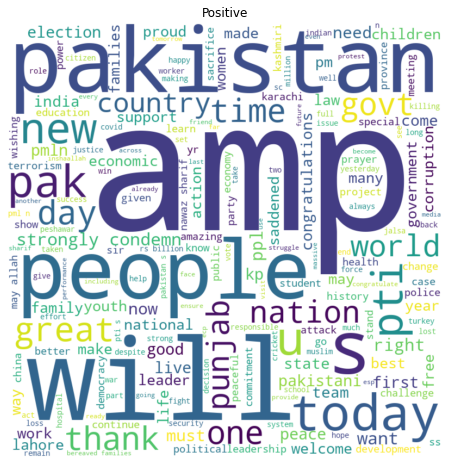

In [47]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# positive sentiment word cloud
positive_tweets = ' '.join(new_df[new_df['Sentiment'] == 'positive']['clean_tweet'].tolist())
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(positive_tweets)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Positive')
plt.axis('off')
plt.show()



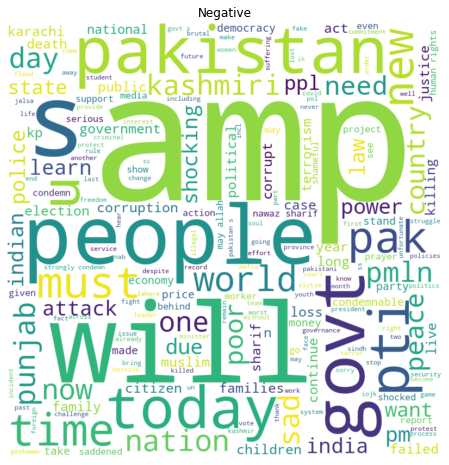

In [48]:
# negative sentiment word cloud
negative_tweets = ' '.join(new_df[new_df['Sentiment'] == 'negative']['clean_tweet'].tolist())
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(negative_tweets)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Negative')
plt.axis('off')
plt.show()




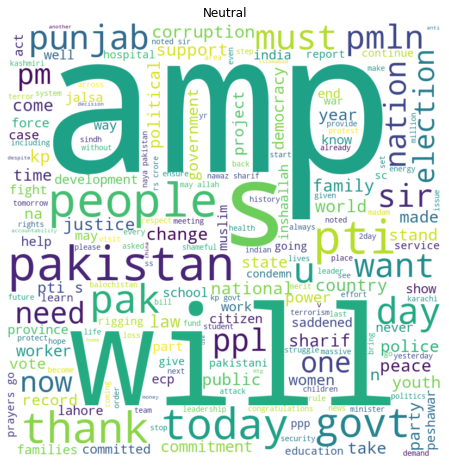

In [49]:
# neutral sentiment word cloud
neutral_tweets = ' '.join(new_df[new_df['Sentiment'] == 'neutral']['clean_tweet'].tolist())
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(neutral_tweets)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Neutral')
plt.axis('off')
plt.show()

In [36]:


# define function to get the most common words in a text
def get_most_common_words(text):
    words = text.split()
    word_count = Counter(words)
    return word_count.most_common(10)


In [37]:
# get the most common words in positive tweets
positive_tweets = ' '.join(new_df[new_df['Sentiment'] == 'positive']['clean_tweet'].tolist())
positive_word_count = get_most_common_words(positive_tweets)
print('Most common words in positive tweets:', positive_word_count)



Most common words in positive tweets: [('the', 4983), ('of', 4088), ('to', 3676), ('amp', 2730), ('in', 2497), ('a', 1797), ('for', 1597), ('is', 1473), ('our', 1039), ('and', 1033)]


In [38]:
# get the most common words in negative tweets
negative_tweets = ' '.join(new_df[new_df['Sentiment'] == 'negative']['clean_tweet'].tolist())
negative_word_count = get_most_common_words(negative_tweets)
print('Most common words in negative tweets:', negative_word_count)


Most common words in negative tweets: [('the', 2312), ('of', 2074), ('to', 1730), ('amp', 1362), ('in', 1306), ('a', 746), ('is', 703), ('for', 587), ('s', 452), ('on', 447)]


In [39]:

# get the most common words in neutral tweets
neutral_tweets = ' '.join(new_df[new_df['Sentiment'] == 'neutral']['clean_tweet'].tolist())
neutral_word_count = get_most_common_words(neutral_tweets)
print('Most common words in neutral tweets:', neutral_word_count)

Most common words in neutral tweets: [('the', 2132), ('of', 1905), ('to', 1826), ('in', 1244), ('amp', 1174), ('for', 737), ('a', 679), ('is', 655), ('on', 507), ('and', 502)]


In [40]:
new_df.to_csv('AnotherFinalDataset.csv')
new_df.head()

,clean_tweet,Sentiment
0,i extend my congratulations to h e luiz inácio...,positive
1,shocked amp deeply saddened by the terrible ac...,negative
2,i am saddened at the tragic death of 146 peopl...,negative
3,for all those spreading rumours about my mtg i...,positive
4,on the 99th republic day of turkiye i extend o...,positive


In [41]:
positive_count = new_df['Sentiment'].value_counts()['positive']
negative_count = new_df['Sentiment'].value_counts()['negative']
neutral_count = new_df['Sentiment'].value_counts()['neutral']
print("Positive Tweets:",positive_count)
print("Negative Tweets:",negative_count)
print("Neutral Tweets:",neutral_count)

Positive Tweets: 4285
Negative Tweets: 1932
Neutral Tweets: 2783


# Implement Model

# MultinomialNB

In [42]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

# load data
data = pd.read_csv('AnotherFinalDataset.csv')
X = new_df['clean_tweet'].values
y = data['Sentiment'].values

# vectorize the text data
vectorizer = CountVectorizer()
X_vec = vectorizer.fit_transform(X)
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

# train the MultinomialNB classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# make predictions on the testing set
y_pred = classifier.predict(X_test)

# evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

confusion = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", confusion)

Accuracy: 0.6794444444444444
Confusion matrix:
 [[193  44 145]
 [ 37 282 221]
 [ 82  48 748]]


# Random Forest

In [43]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [44]:
data = pd.read_csv("AnotherFinalDataset.csv")
# Remove null values
data.dropna(inplace=True)

# Split the data into features and target variable
X = data['clean_tweet']
y = data['Sentiment']

# Convert text to numerical features using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
# Predict the test set labels
y_pred = rf_model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy is :", accuracy)



Accuracy is : 0.7322222222222222


# SVM Implementation.


In [45]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

class SVM:
    
    # Load the data
    data = pd.read_csv('AnotherFinalDataset.csv')
    tweets = data['clean_tweet'].values
    labels = data['Sentiment'].values

    # Preprocess the data
    vectorizer = TfidfVectorizer(stop_words='english')
    X = vectorizer.fit_transform(tweets)
    y = labels

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the SVM model
    svm = SVC(kernel='linear', C=1, gamma='scale')
    svm.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = svm.predict(X_test)

    # Evaluate the model's performance
    print("Accuracy:", accuracy_score(y_test, y_pred))

    

    
    

Accuracy: 0.7088888888888889


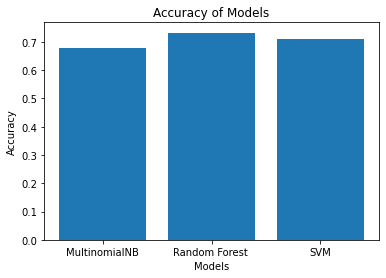

In [46]:
model_names = ['MultinomialNB', 'Random Forest ', 'SVM']
accuracies = [0.6794444444444444, 0.7322222222222222,  0.70888888888888890]

plt.bar(model_names, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Models')
plt.show()


# GUI's

In [60]:
import tkinter as tk
from tkinter import scrolledtext
from textblob import TextBlob

# define a function to perform sentiment analysis
def analyze_sentiment():
    # retrieve the text input from the user
    text = input_text.get('1.0', tk.END)

    # perform sentiment analysis using TextBlob
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity

    # determine the sentiment and display the result
    if polarity > 0:
        sentiment = 'Positive'
    elif polarity < 0:
        sentiment = 'Negative'
    elif polarity==0:
        sentiment = 'Neutral'
    result_text.set(f'Sentiment: {sentiment}\n'
                    f'Polarity: {polarity:.2f}')

# create a GUI window
root = tk.Tk()
root.title('Sentiment Analysis')

# create a text box for user input
input_label = tk.Label(root, text='Enter some text:')
input_label.pack(side=tk.TOP)
input_text = scrolledtext.ScrolledText(root, width=50, height=10)
input_text.pack(side=tk.TOP)

# create a button to perform sentiment analysis
analyze_button = tk.Button(root, text='Analyze', command=analyze_sentiment)
analyze_button.pack(side=tk.TOP)

# create a label to display the results
result_text = tk.StringVar()
result_label = tk.Label(root, textvariable=result_text)
result_label.pack(side=tk.TOP)

# start the GUI loop
root.mainloop()


# Don't Run Below Code